In [1]:
!pip install pingouin
!pip install geopandas

In [2]:
# Import pandas and the hostels dataframe and check columns and values
import pandas as pd
df = pd.read_csv("backpacking_hostel_data_cleaned.csv")
display(df.head())

,country,city,name,description,rating,reviews,km_to_centre,min_private_price,min_dorm_price
0,Colombia,Medellin,Secret Buddha,Home away from home. That Simple. If you wish ...,9.6,160,14.65,15.64,14.63
1,Colombia,Medellin,Baku laureles Hostel,A perfect place for travellers who want to imm...,10.0,6,1.85,NaN,11.25
2,Colombia,Medellin,Hostel Metro Floresta,Our hostel is always full of lovely vibes. Her...,9.6,28,2.44,10.35,10.35
3,Colombia,Medellin,Yellow House Hostel,"We are Yellow House Hostel, a very quiet, nice...",9.5,5,2.43,7.88,7.88
4,Colombia,Medellin,Viajero Medellin Hostel,360 Â° view of Medelli­n in the coolest neighb...,9.4,901,4.79,21.80,18.00


# Exploratory Data Analysis

## Single variable analysis

The distribution of all column with numerical values was shown in the form of a histogram. From the results observed in the plots we can conclude the following for each variable:

 - **rating**: The rating histogram shows a clear left skewed distribution with the majority of values located between 8.5 and 10. This seems to indicate that most hostels have a good rating and that hostel user tend to be generous when rating installations. 
    
 - **reviews**: As already suspected during the data cleaning and validation, the vast majority of hostels have a very low number of reviews, while some hostels have an exceptionally high amount of reviews that seem to go up to around 8000.
    
 - **km_to_centre**: The histogram showing the distribution of distance to the centre of town is clearly skewed to the right. The majority of the hostels seem to be within 2 km of the city centre. With distances bigger than that, the amount of hostels seem to decrease decrease drastically and with a direct inverse correlation between distance and hostel count. 
    
 - **min_private_price** and **min_dorm_price**: Both distribution plots reveal a clear right skew. The overall distribution shape is very similar for both variables with the exception of a shift of lower prices in the dorms. This is to be expected since dorms tend to have lower prices than private rooms. The majority of prices for private rooms is lower than 25€ while the majority of prices for dorms is lower than 15€.
    - To prepare the price variables for future statistical analysis, a logarithmic transformation was applied to both columns, resulting in the creation of new columns to store the logarithmic values of the original price data. Upon visual inspection, the transformed data exhibited a distribution that closely resembled a normal curve, indicating a notable reduction in its previous right skewness.

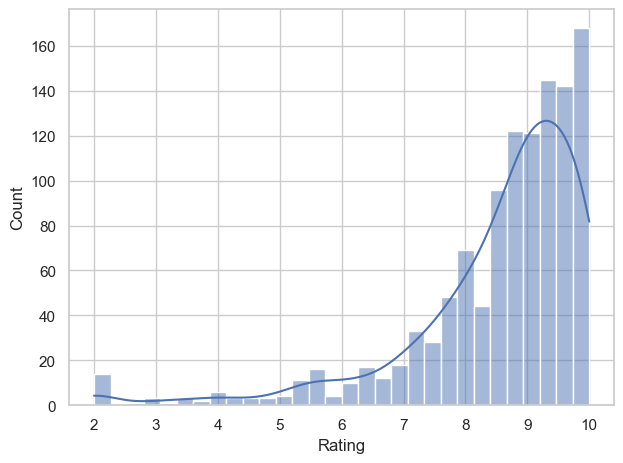

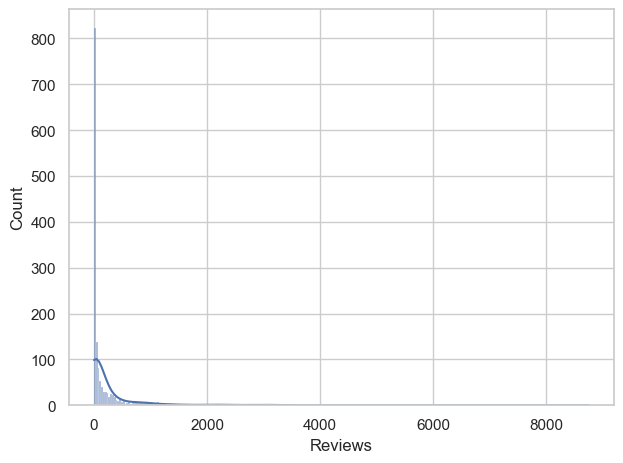

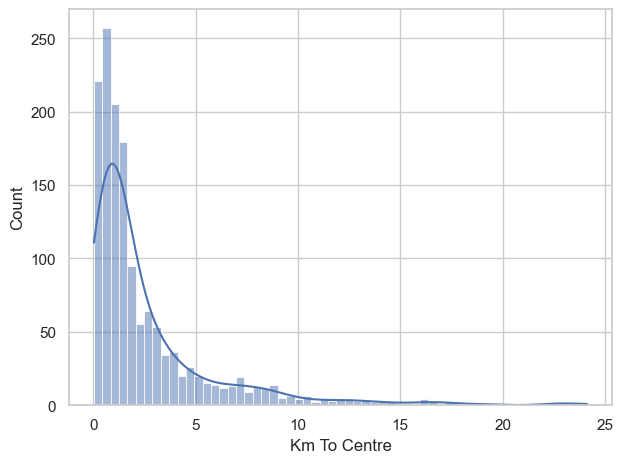

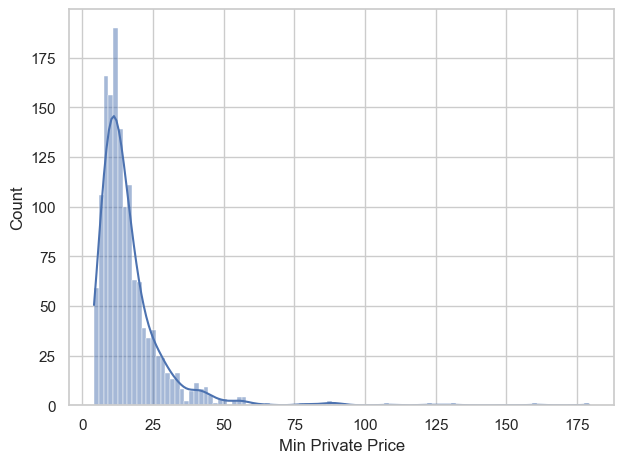

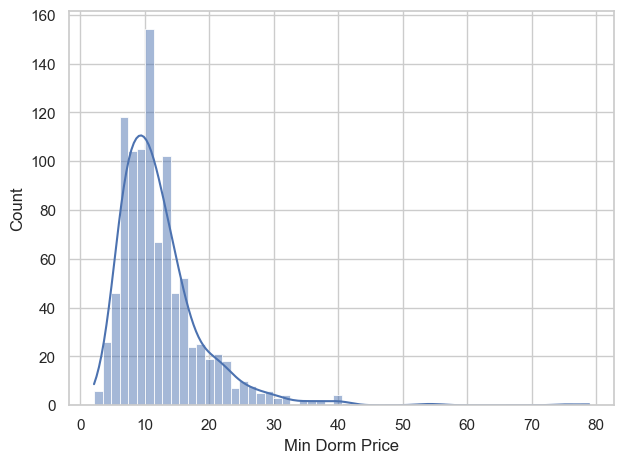

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a list with the numerical values varibles to be plotted
numerical_values = ["rating", "reviews", "km_to_centre", "min_private_price", "min_dorm_price"]

# Plot histograms for each numerical varible
for column in numerical_values:
    ax = sns.histplot(data=df[column], kde=True)
    ax.set_xlabel(column.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


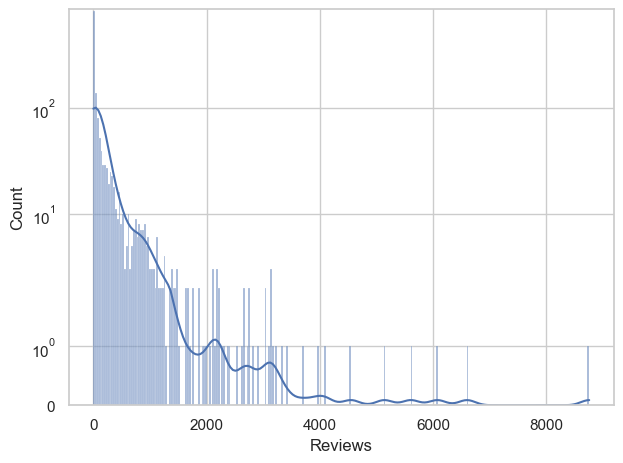

In [30]:
# Plot the review distribution after a log transformation of the count
ax = sns.histplot(data=df["reviews"], kde=True)
ax.set_xlabel("Reviews")
plt.yscale('symlog')
plt.tight_layout()
plt.show()

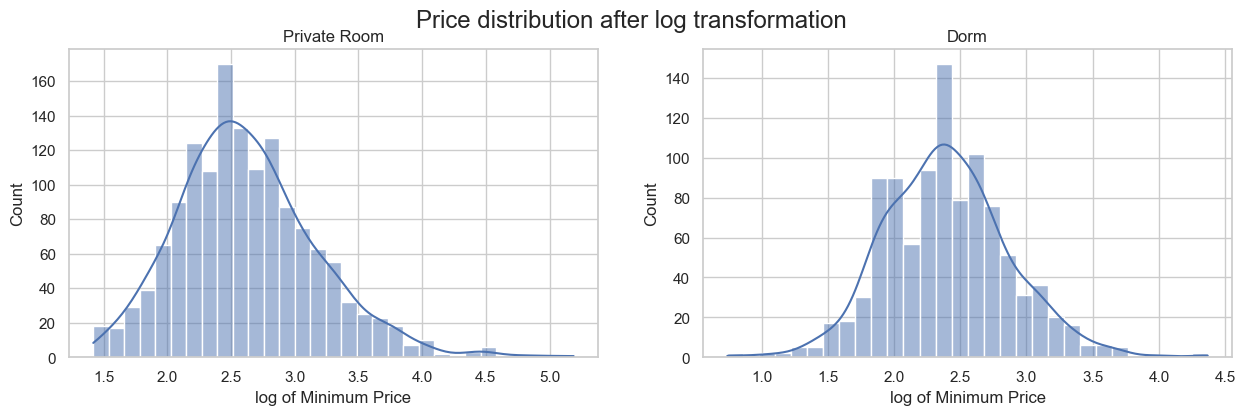

In [4]:
# Apply logarithmic transformation to the "min_private_price" and "min_dorm_price" columns
df["log_private"] = np.log(df["min_private_price"])
df["log_dorm"] = np.log(df["min_dorm_price"])

# Create a figure and subplots layout
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Loop through the two variables for plotting
for i, variable in enumerate(["log_private", "log_dorm"]):
    # Create a histogram plot
    sns.histplot(data=df, x=variable, kde=True, ax=axes[i])

# Set the figure title and subplot titles, and labels
fig.suptitle("Price distribution after log transformation", size='x-large')
axes[0].set_title("Private Room")
axes[0].set_xlabel("log of Minimum Price")
axes[1].set_title("Dorm")
axes[1].set_xlabel("log of Minimum Price")

# Display the plot
plt.show()


## Multiple variable analysis

### Price range of hostel rooms by country

The distribution of prices in private rooms and dorms by country was depicted using boxplots to examine potential differences between countries. The boxplots indicated some variations, particularly in the case of Bolivia and Chile, hinting at possible significant differences in overall price distributions.

To assess the statistical significance of these observations, an Analysis of Variance (ANOVA) test was deemed necessary. Before conducting the ANOVA analysis, a critical step involved plotting the distribution of the logarithms of prices by country to determine if all populations exhibited a normal distribution. This step is essential as it verified the suitability of ANOVA for further investigation, as the test requires that compared populations resemble a normal distribution. Additionally, it was confirmed that all groups have a sample size over 30, ensuring that another of the assumptions for ANOVA is met.

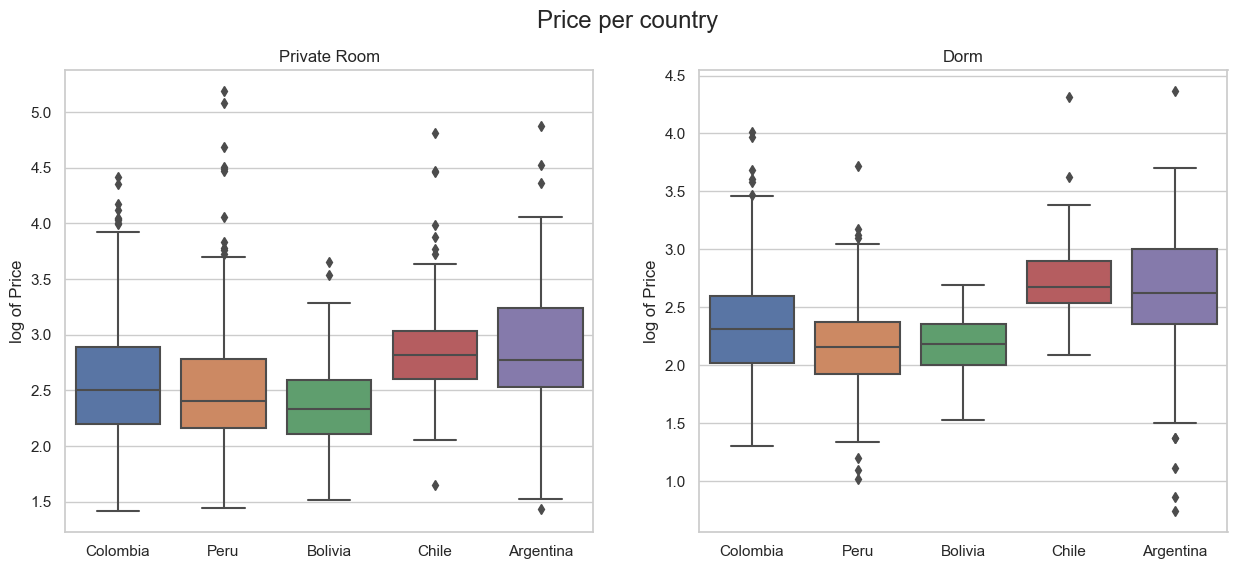

In [15]:
# Create a figure and subplots layout with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Loop through two variables for plotting: "log_private" and "log_dorm"
for i, variable in enumerate(["log_private", "log_dorm"]):
    # Create a box plot comparing "country" on the x-axis and "log_private" or "log_dorm" on the y-axis
    sns.boxplot(data=df, x="country", y=variable, ax=axes[i])
    
    # Set the y-axis label as "log of Price"
    axes[i].set_ylabel("log of Price")
    
    # Remove x-axis label to keep it clean
    axes[i].set_xlabel(None)
    
# Set the figure title and subplot titles
fig.suptitle("Price per country", size='x-large')
axes[0].set_title("Private Room")
axes[1].set_title("Dorm")

# Display the plot
plt.show()


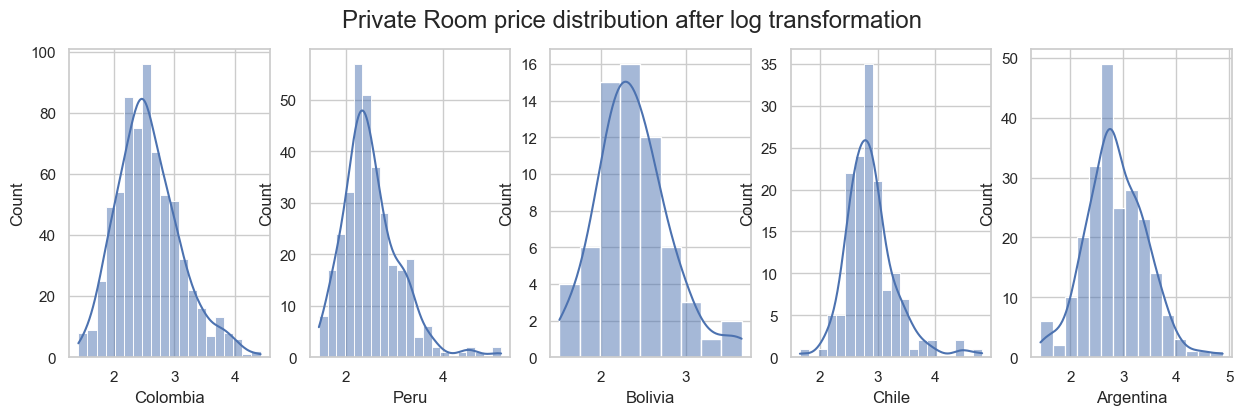

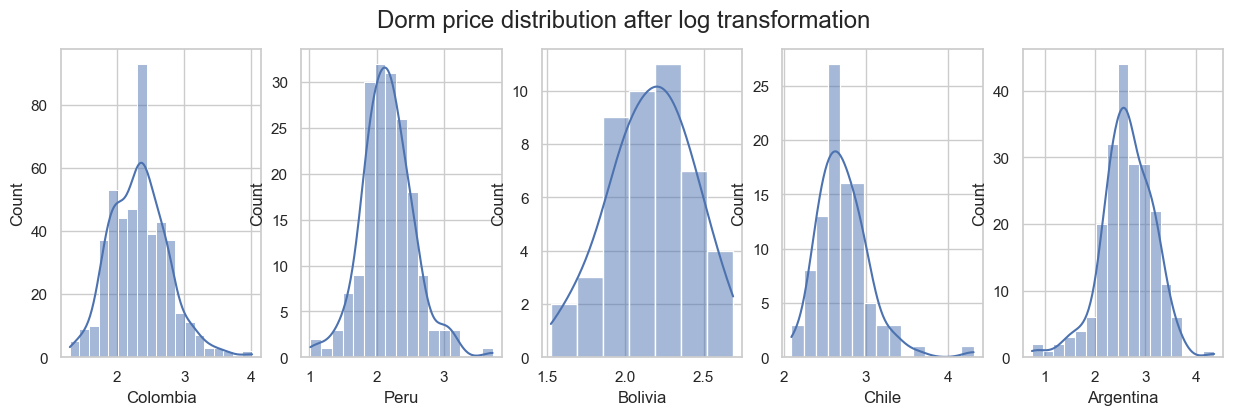

Colombia     717
Peru         338
Argentina    262
Chile        157
Bolivia       68
Name: country, dtype: int64


In [6]:
# Get unique countries from the "country" column
target_countries = df["country"].unique()

# Filter the DataFrame to include only the target countries
filtered_df = df[df['country'].isin(target_countries)]

# Create a figure and subplots layout with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Loop through each target country
for i, country in enumerate(target_countries):
    # Create a histogram plot for "log_private" prices for the current country
    sns.histplot(data=filtered_df[filtered_df['country'] == country], x='log_private', label=country, kde=True, ax=axes[i])
    
    # Set the x-axis label to the current country's name
    axes[i].set_xlabel(country)

# Set the figure title for "Private Room" price distribution
fig.suptitle("Private Room price distribution after log transformation", size='x-large')

# Display the first set of histograms
plt.show()

# Create another figure and subplots layout with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Loop through each target country again
for i, country in enumerate(target_countries):
    # Create a histogram plot for "log_dorm" prices for the current country
    sns.histplot(data=filtered_df[filtered_df['country'] == country], x='log_dorm', label=country, kde=True, ax=axes[i])
    
    # Set the x-axis label to the current country's name
    axes[i].set_xlabel(country)

# Set the figure title for "Dorm" price distribution
fig.suptitle("Dorm price distribution after log transformation", size='x-large')

# Display the second set of histograms
plt.show()

print(df["country"].value_counts())


In this case, an ANOVA (Analysis of Variance) test is performed to evaluate whether there is a significant difference in the private rooms and dorm prices product across multiple countries. The null hypothesis (H0) suggests that the average prices in these countries are equal, while the alternative hypothesis (Ha) proposes that there are variations in average prices among the countries. The ANOVA test helps determine if there is enough statistical evidence to reject the null hypothesis and conclude that at least one country's average price is different from the others. A significance level of 0.05 was chosen for this and the following statistichal tests.

The output provided as a result of an ANOVA test both for the private room and dorm room prives showcases a p-value that is clearly below our significance level, indicating strong evidence against the null hypothesis. This suggests that there are significant differences in the prices between at least some of the countries.

To determine which specific country pairs have significant differences in prices, additional pairwise tests were performed on the data. The results show that the difference in prices in private rooms is significantly different between all country pairs except for Argentina-Chile, Bolivia-Peru and Colombia-Peru. The same results were observed for the dorm prices, with the only expcetion that in this case also the difference in prices between Colombia and Peru is significant. 

In [7]:
# Import the pingouin library for statistical analysis
import pingouin

# Define a function to compare prices between countries
def country_price_comparer(price_column, alpha):
    # Determine the room type based on the given price column
    if price_column == "log_private":
        room_type = "private room"
    elif price_column == "log_dorm":
        room_type = "dorm"
    else:
        room_type = "unknown room type"
    
    # Perform an ANOVA test to analyze price differences between countries
    anova_table = pingouin.anova(data=df, dv=price_column, between='country')

    # Check if there are significant price differences between countries
    if anova_table.iloc[0, 4] < alpha: 
        # Print a message indicating significant differences and display the ANOVA table
        print(f"\n\nThere are significant differences in the {room_type} prices between at least some of the countries")
        print(anova_table)
        
        # Perform pairwise t-tests to compare prices between specific country pairs
        pairwise_results = pingouin.pairwise_tests(data=df, dv=price_column, between='country', padjust="bonf")
        
        # Print country pairs with significant differences and those without
        print(f"\n\nCountry pairs with significant differences in {room_type} prices:")
        print(pairwise_results[pairwise_results["p-corr"] < alpha][["A", "B", "p-corr"]])
        print(f"\n\nCountry pairs without significant differences in {room_type} prices:")
        print(pairwise_results[pairwise_results["p-corr"] > alpha][["A", "B", "p-corr"]])
    else: 
        # If no significant differences found, print a message
        print("There aren't any significant differences in the prices amongst countries")    

# Compare prices for "log_private" and "log_dorm" columns with a significance level of 0.05
country_price_comparer("log_private", 0.05)
country_price_comparer("log_dorm", 0.05)




There are significant differences in the private room prices between at least some of the countries
    Source  ddof1  ddof2          F         p-unc       np2
0  country      4   1435  27.261668  7.774025e-22  0.070624


Country pairs with significant differences in private room prices:
           A         B        p-corr
0  Argentina   Bolivia  9.035022e-11
2  Argentina  Colombia  5.254429e-10
3  Argentina      Peru  2.480841e-10
4    Bolivia     Chile  2.066642e-11
5    Bolivia  Colombia  8.782811e-03
7      Chile  Colombia  3.820172e-11
8      Chile      Peru  2.147405e-11


Country pairs without significant differences in private room prices:
           A      B    p-corr
1  Argentina  Chile  1.000000
6    Bolivia   Peru  0.229403
9   Colombia   Peru  1.000000


There are significant differences in the dorm prices between at least some of the countries
    Source  ddof1  ddof2          F         p-unc       np2
0  country      4    986  50.399847  1.249830e-38  0.169754


Count

### Correlation between ratings, distance to centre and prices

A heatmap was generated to explore potential correlations among the numerical variables within the data frame. In the majority of cases, the correlation coefficient values were found to be close to zero, indicating a lack of significant linear relationships between these variables. However, one exception was observed in the correlation between private room and dorm prices, which exhibited a relatively strong correlation coefficient of 0.69. This result aligns with expectations, as it suggests a positive linear relationship between the prices of private rooms and dorms in hostels.

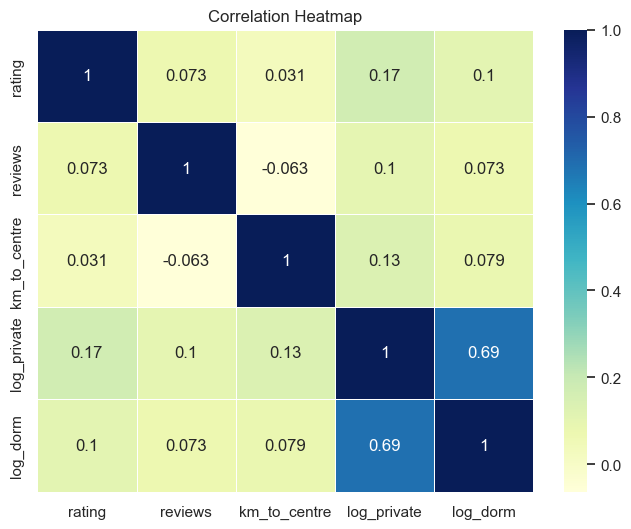

In [8]:
# Select the numerical columns of interest
df_numerical = df[["rating", "reviews", "km_to_centre", "log_private", "log_dorm"]]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create and display the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Best and worst locations for hostels

In this segment of the analysis, the primary focus was to assess the quality of hostel accommodations by country and city, as perceived by guests. To ensure the reliability of our findings, we filtered the dataset to exclusively include hostels with  five or more reviews, guaranteeing a substantial number of evaluations.

Chile emerged as the highest-rated country, boasting an average rating of 8.69. Following closely behind, Colombia secured a second place with an average rating of 8.65, while Peru obtained a mean rating of 8.56. On the other end of the spectrum, Bolivia and Argentina found themselves with the lowest ratings among the analyzed countries, with mean scores of 8.48 and 8.39, respectively.

Turning our attention to individual cities, we identified those with over ten hostel observations, ensuring a robust dataset for analysis. San Gil emerged as the standout city for hostel accommodations, achieving an exceptional average rating of 9.45. Additionally, cities such as Minca (8.89), Mendoza (8.87), San Pedro De Atacama (8.86), and Palomino (8.86) established themselves as excellent choices for travelers seeking top-tier hostel experiences. Conversely, our analysis revealed the five cities with the lowest average hostel ratings based on the dataset. These cities include Salta (Rating: 8.09), Machu Picchu (Rating: 8.09), Puerto Iguazu (Rating: 8.12), Bogota (Rating: 8.16), and Cartagena (Rating: 8.18). 

In [18]:
# Filter hostels with >10 reviews
df_reviews = df[df["reviews"] >= 5]

# Calculate and sort mean rating per country
country_ratings = df_reviews.groupby("country")["rating"].mean()
sorted_countries_by_ranking = country_ratings.reset_index().sort_values(by="rating", ascending=False)
display(sorted_countries_by_ranking)

# Create a DataFrame for cities with >10 observations
city_counts = df_reviews['city'].value_counts()
selected_cities = city_counts[city_counts > 10].index.tolist()
filtered_df = df_reviews[df_reviews['city'].isin(selected_cities)]

# Calculate and sort mean rating per country
city_ratings = filtered_df.groupby("city")["rating"].mean()
sorted_cities_by_ranking = city_ratings.reset_index().sort_values(by="rating", ascending=False)
display(sorted_cities_by_ranking.head(10))
display(sorted_cities_by_ranking.tail(10))

,country,rating
2,Chile,8.689524
3,Colombia,8.645154
4,Peru,8.556019
1,Bolivia,8.482979
0,Argentina,8.393296


,city,rating
22,San Gil,9.453333
15,Minca,8.888889
14,Mendoza,8.868421
23,San Pedro De Atacama,8.860000
16,Palomino,8.859091
4,Cali,8.858333
11,Lima,8.796875
9,Huaraz,8.778947
6,Cordoba,8.772727
7,Cuzco,8.715556


,city,rating
18,Puerto Natales,8.390909
0,Arequipa,8.310000
1,Bariloche,8.250000
25,Santiago,8.247368
10,La Paz,8.213333
5,Cartagena,8.179487
2,Bogota,8.160870
17,Puerto Iguazu,8.120000
12,Machu Picchu,8.093750
21,Salta,8.091667


### Backpacker density by location

The next step for the exploratory data analysis was to determine the density of backpackers in every country and city. In order to determine this, the amount of hostels with dorms per inhabitant per city and country was calculated. 

The first step during this process was to merge our hostel data frame with a population .csv dataframe obtained from https://simplemaps.com/data/world-cities to add the population of each city to the dataframe. According to their website, the population of the cities was last updatede in 2023. After that, the population of each country in 2022 was added merging data obtained from https://www.worldbank.org/en/home. According to their website, the population of the countries was last updated in 2022. To ensure the hostels analysed are backpacker-friendly, all hostels that did not offer dorms were removed from the dataframe. 

In [10]:
# Read the population data from a CSV file
population_cities = pd.read_csv("worldcities.csv")
population_countries = pd.read_csv("countriespop.csv")

# Merge the hostel data with new dataframes to add country and city population values
hostels_with_population = pd.merge(df, population_cities, how="left", left_on=["country", "city"], right_on=["country", "city_ascii"])
hostels_with_population = pd.merge(hostels_with_population, population_countries, how = "left", left_on = "country", right_on = "Country Name")

# Drop unwanted columns and rows missing data on dorms
hostels_with_population.dropna(subset = 'min_dorm_price', inplace = True)
print(hostels_with_population.columns)
columns_to_drop = ['description', 'rating', 'reviews', 'km_to_centre', 'min_private_price', 'min_dorm_price', 'city_ascii', 'log_private', 'log_dorm', 'city_y', 'iso2', 'iso3', 'capital', 'id', 'Country Name']
hostels_with_population.drop(columns=columns_to_drop, inplace=True)

# Rename columns for clarity
hostels_with_population.rename(columns = {'population':'city_pop', "2022":"country_pop", 'city_x':'city'}, inplace = True)

# Display the resulting DataFrame
display(hostels_with_population)

Index(['country', 'city_x', 'name', 'description', 'rating', 'reviews',
       'km_to_centre', 'min_private_price', 'min_dorm_price', 'log_private',
       'log_dorm', 'city_y', 'city_ascii', 'lat', 'lng', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id', 'Country Name', '2022'],
      dtype='object')


,country,city,name,lat,lng,admin_name,city_pop,country_pop
0,Colombia,Medellin,Secret Buddha,6.2308,-75.5906,Antioquia,2529403.0,51874024.0
1,Colombia,Medellin,Baku laureles Hostel,6.2308,-75.5906,Antioquia,2529403.0,51874024.0
2,Colombia,Medellin,Hostel Metro Floresta,6.2308,-75.5906,Antioquia,2529403.0,51874024.0
3,Colombia,Medellin,Yellow House Hostel,6.2308,-75.5906,Antioquia,2529403.0,51874024.0
4,Colombia,Medellin,Viajero Medellin Hostel,6.2308,-75.5906,Antioquia,2529403.0,51874024.0
...,...,...,...,...,...,...,...,...
1539,Argentina,Belen,Hostel Centro de Belen,-27.6500,-67.0333,Catamarca,12252.0,46234830.0
1540,Argentina,Trevelin,Hostel Luan Posada de Montaña,NaN,NaN,NaN,NaN,46234830.0
1541,Argentina,El Soberbio,Live Moconá,NaN,NaN,NaN,NaN,46234830.0
1542,Argentina,Victoria,Florida Hostel,-32.6167,-60.1667,Entre Ríos,30623.0,46234830.0


Cities with lower populations might not be present in the dataframe used to add population values. Furthermore, some city names might not exactly match in both merged dataframes, which could lead to some bigger cities missing population values in the merged table. It was therefore checked if any cities were missing population values and if so how the number of backpacker hostels in those cities. 

Cities with lower populations are of special interest for our analysis since the density of hostels per inhabitant will be more pronounced when calculated for small populations. For this reason, for cities that were population missing data and had 5 or more hostels, the population values were added by mapping a dictionary containing the population of those cities. The dictionary was created by looking up on the internet the population of those cities.

The analysis focused then on calculating the density of backpacker hostels per inhabitant for all cities and countries. The resulting data was then visualized on a map. This visualization highlighted that among the five tested countries, Colombia stood out as having the highest density of backpacker hostels per inhabitant, with 9 backpacker hostels for every million inhabitants. Furthermore, when zooming in on individual cities, it became evident that Huacachina and Minca were the standout locations with the most significant concentration of backpacker hostels. Specifically, these two cities boasted an impressive 42 and 38 hostels per 1000 inhabitants, respectively.

In [11]:
# Identify cities with missing population data
missing_cities = hostels_with_population[hostels_with_population['city_pop'].isna()]

# Count the occurrences of each missing city and convert counts to a dictionary
missing_cities_count = missing_cities["city"].value_counts()
missing_cities_dict = missing_cities_count.to_dict()
print(missing_cities_dict)

# This dictionary maps city names to their corresponding population values
missing_cities_population = {
    'Cuzco': 428450,
    'Bariloche': 108250,
    'Palomino': 3900,
    'Minca': 500,
    'San Pedro De Atacama': 3899,
    'Salento': 7247,
    'Taganga': 5021,
    'San Andres Island': 61280,
    'Machu Picchu': 4525,
    'Barichara': 7063,
    'Mar Del Plata': 682605,
    'Tilcara': 6249,
    'Villa De Leyva': 16984,
    'Paracas': 1252,
    'Huacachina': 120,
    'Rincon Del Mar': 4000,
    'Huanchaco': 87192,
    'El Chalten': 1627
}

# Update the 'city_pop' column with population data for missing cities
hostels_with_population['city_pop'] = hostels_with_population['city'].map(missing_cities_population).fillna(hostels_with_population['city_pop'])


{'Cuzco': 38, 'Bariloche': 26, 'Palomino': 24, 'Minca': 19, 'San Pedro De Atacama': 18, 'Salento': 18, 'Taganga': 14, 'San Andres Island': 8, 'Machu Picchu': 7, 'Barichara': 7, 'Mar Del Plata': 7, 'Tilcara': 7, 'Villa De Leyva': 6, 'Paracas': 5, 'Huacachina': 5, 'Rincon Del Mar': 5, 'Huanchaco': 5, 'El Chalten': 5, 'Ollantaytambo': 4, 'Copacabana': 4, 'Capurgana': 4, 'Bahia Solano': 4, 'Santa Cruz De La Sierra': 3, 'San Miguel De Tucuman': 3, 'Mongui': 3, 'Vina Del Mar': 3, 'Chiloe': 2, 'Easter Island': 2, 'Epuyen': 2, 'Baru Island': 2, 'Isla Fuerte': 2, 'Guachaca': 2, 'San Martin De Los Andes': 2, 'San Salvador De Jujuy': 2, 'Buritaca': 2, 'Trevelin': 1, 'La Higuera': 1, 'Mina Clavero': 1, 'San Ignacio': 1, 'Elqui Valley': 1, 'Capilla Del Monte': 1, 'San Marcos Sierras': 1, 'Los Penitentes': 1, 'Villa De Merlo': 1, 'Palma Island': 1, 'Colan': 1, 'Los Organos': 1, 'Rosario Island': 1, 'Tintipan Island': 1, 'Mompos': 1, 'Villavieja': 1, 'Sapzurro': 1, 'Santa Rosa De Cabal': 1, 'Doradal'

In [12]:
def calculate_population_density(data, group_by_column, population_column, new_col_name):
    # Group the DataFrame by the specified column and calculate the number of items in each group
    counts_by_group = data[group_by_column].value_counts().reset_index()
    counts_by_group.columns = [group_by_column, 'hostel_count']

    # Merge the counts back into the original DataFrame
    df_with_counts = data.merge(counts_by_group, on=group_by_column)

    # Calculate population density by dividing the count by the population and multiplying by 1000
    if group_by_column == 'city':
        df_with_counts[new_col_name] = round ((df_with_counts['hostel_count'] / df_with_counts[population_column]) * 1000)
        result =  df_with_counts.groupby(group_by_column)[new_col_name].mean()
    else:
        df_with_counts[new_col_name] = round ((df_with_counts['hostel_count'] / df_with_counts[population_column]) * 1000000 ) 
        result = df_with_counts.groupby(group_by_column)[new_col_name].mean()
    
    # Return sorted table by density
    return result.reset_index().sort_values(by=new_col_name, ascending=False)

# Example usage for city population density
city_population_density = calculate_population_density(hostels_with_population, 'city', 'city_pop', 'hostel_per_thousand')
display(city_population_density)

# Example usage for country population density
country_population_density = calculate_population_density(hostels_with_population, 'country', 'country_pop', 'hostel_per_million')
display(country_population_density)

,city,hostel_per_thousand
51,Huacachina,42.0
83,Minca,38.0
94,Palomino,6.0
130,San Pedro De Atacama,5.0
95,Paracas,4.0
...,...,...
151,Trevelin,NaN
159,Valle Del Cauca,NaN
166,Villa De Merlo,NaN
169,Villavieja,NaN


,country,hostel_per_million
3,Colombia,9.0
0,Argentina,5.0
2,Chile,5.0
4,Peru,5.0
1,Bolivia,4.0


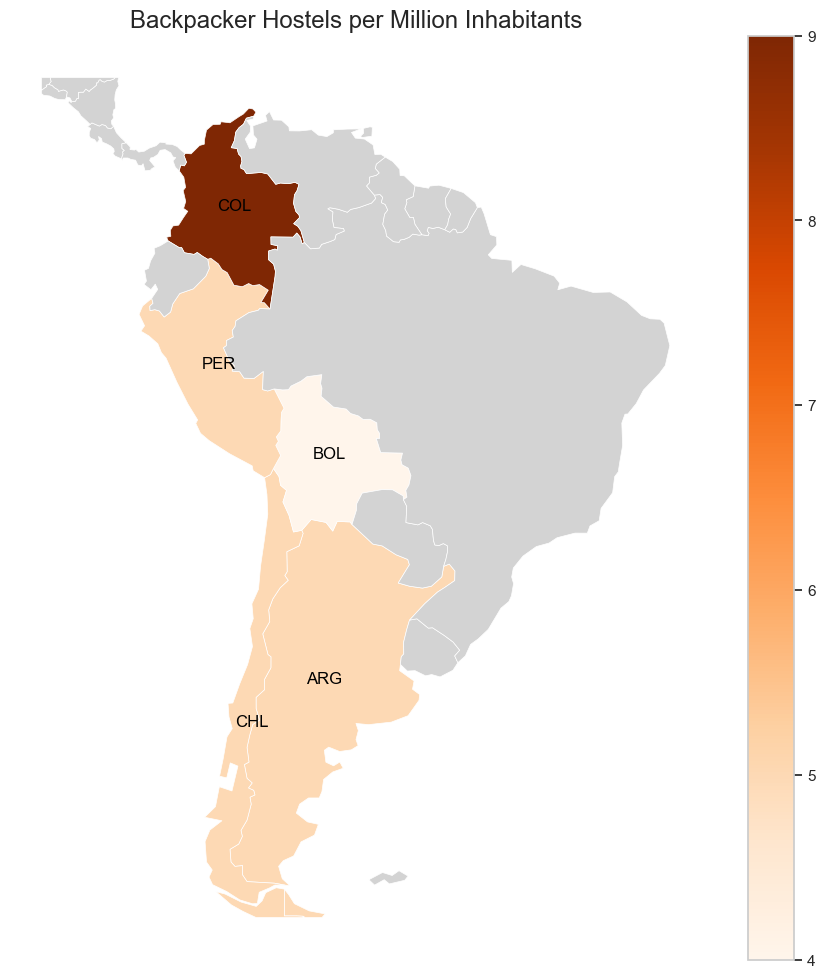

In [13]:
# Import necessary libraries
import geopandas as gpd
from geopandas.datasets import get_path

# Load the world GeoDataFrame
world = gpd.read_file("ne_110m_admin_0_countries")

# Merge population density data with the world map data based on country names
merged = world.merge(country_population_density, how='left', left_on='ADMIN', right_on='country')

# Create a figure to plot the map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the data using a color map, specifying the column for coloring
merged.clip([-90, -55, -25, 15]).plot(column='hostel_per_million', 
                                      cmap='Oranges', 
                                      linewidth=0.5, 
                                      ax=ax, 
                                      edgecolor='1', 
                                      legend=True, 
                                      missing_kwds={'color': 'lightgray'})

# Annotate country names on the map (if data is available)
merged.apply(lambda x: ax.annotate(text=x.SOV_A3, 
                                   xy=x.geometry.centroid.coords[0], 
                                   ha='center', color="black") 
                if not pd.isna(x['hostel_per_million']) else None, axis=1)

# Configure the plot appearance and title
plt.axis('off')  
plt.title('Backpacker Hostels per Million Inhabitants', fontsize='x-large', ha='center')
plt.show() 


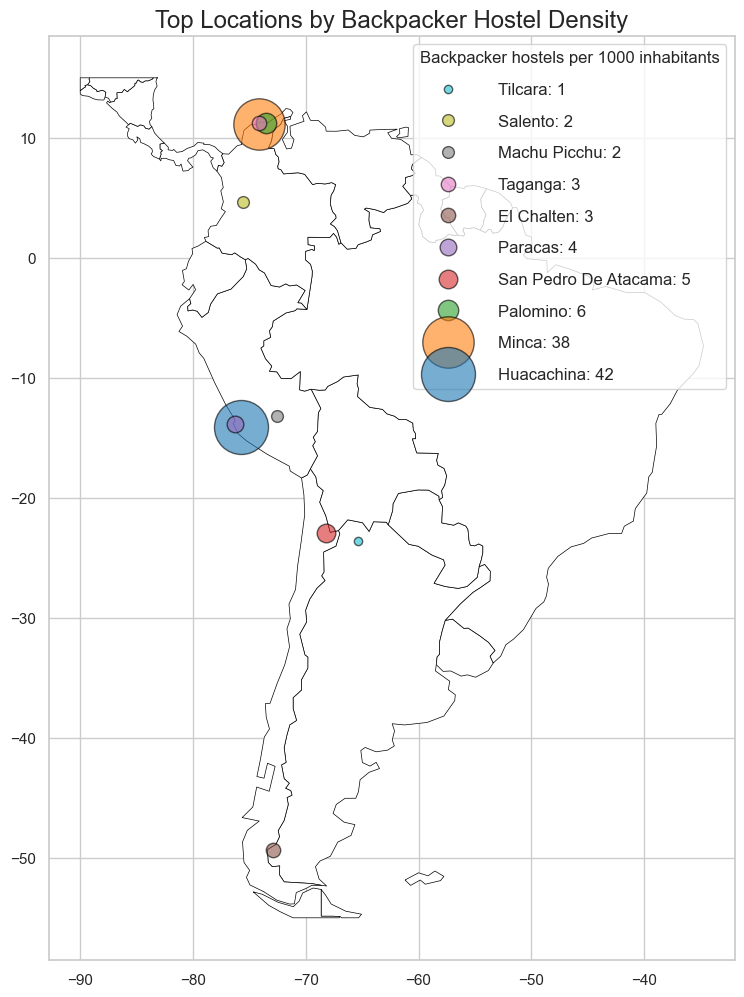

In [14]:
from shapely.geometry import Point

# Create a GeoDataFrame from city population density data
data = gpd.GeoDataFrame(city_population_density.to_dict())

# Select the top 10 cities by density and reset the index
top_cities = city_population_density[:10].reset_index()

# Define the geographic points (latitude and longitude) for these cities
geometry = [Point(-75.763333, -14.0875), 
            Point(-74.1175, 11.143556), 
            Point(-73.5625, 11.244167), 
            Point(-68.2, -22.916667), 
            Point(-76.2666700, -13.8666700), 
            Point(-72.886129, -49.331408), 
            Point(-74.190828, 11.267479), 
            Point(-72.544962, -13.1631412), 
            Point(-75.570833, 4.637222),
            Point(-65.3934201, -23.576809)]

# Create a GeoDataFrame for the top cities with their geometry
city_gdf = gpd.GeoDataFrame(top_cities, geometry=geometry)

# Create a map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the world map with specified boundaries and styling
world.clip([-90, -55, -25, 15]).plot(linewidth=0.5, 
                                      ax=ax, 
                                      edgecolor='0', 
                                      legend=True,
                                      color='white')

# Create a list of unique colors for the cities
colors = plt.cm.tab10(np.linspace(0, 1, len(city_gdf)))

# Plot each city with a unique color and add labels for the legend
for i, row in city_gdf.iterrows():
    color = colors[i]
    city_name = f"{row['city']}: {int(row['hostel_per_thousand'])}"
    ax.plot(row.geometry.x, 
            row.geometry.y, 
            marker='o', 
            markersize=np.sqrt(row.hostel_per_thousand) * 6, 
            markeredgecolor='black',
            color=color, 
            alpha=0.6, 
            label=city_name)

# Customize legend appearance
plt.rcParams['legend.handlelength'] = 0
plt.rcParams['legend.numpoints'] = 1

# Add and configure the legend
ax.legend(loc='upper right', 
          fontsize="medium", 
          labelspacing=1,
          handletextpad=3,
          title='Backpacker hostels per 1000 inhabitants', 
          title_fontsize='medium', reverse=True)

# Add a title to the plot and show the plot
plt.title("Top Locations by Backpacker Hostel Density", fontsize="x-large")
plt.show()